<a href="https://colab.research.google.com/github/josephtrill/CSST102_TRILLANA_BSCS-3A/blob/main/3A_TRILLANA_MP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Problem No. 4: K-Means Clustering on a Customer Segmentation Dataset**

**Obejective**
The objective of this task is to demonstrate your ability to implement the K-Means clustering algorithm for customer segmentation. You will be responsible for preprocessing the dataset, applying the K-Means algorithm, and evaluating the outcomes. Furthermore, you are required to visualize the resulting clusters and analyze the characteristics of each segment.

In [1]:
# Data Exploration and Preprocessing

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('customer_segmentation.csv')

In [3]:
# Exploratory Data Analysis (EDA)
print(data.head(10))

   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6
5           6   30         35000             77
6           7   50         75000             35
7           8   29         32000             68
8           9   43         45000             53
9          10   36         42000             83


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     20 non-null     int64
 1   Age            20 non-null     int64
 2   AnnualIncome   20 non-null     int64
 3   SpendingScore  20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes
None


In [5]:
print(data.describe())

       CustomerID        Age  AnnualIncome  SpendingScore
count    20.00000  20.000000      20.00000      20.000000
mean     10.50000  35.800000   45600.00000      58.500000
std       5.91608   8.538458   19129.47574      22.361857
min       1.00000  22.000000   15000.00000       6.000000
25%       5.75000  29.750000   36500.00000      41.500000
50%      10.50000  35.500000   42500.00000      57.500000
75%      15.25000  40.250000   52750.00000      77.000000
max      20.00000  55.000000  100000.00000      92.000000


In [6]:
# Missing values
print(data.isnull().sum())

CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


In [7]:
# Handling missing values
df = data.dropna()

In [8]:
# Normalize or Scale the Data
from sklearn.preprocessing import StandardScaler

features = ['Age', 'AnnualIncome', 'SpendingScore']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(data[features])

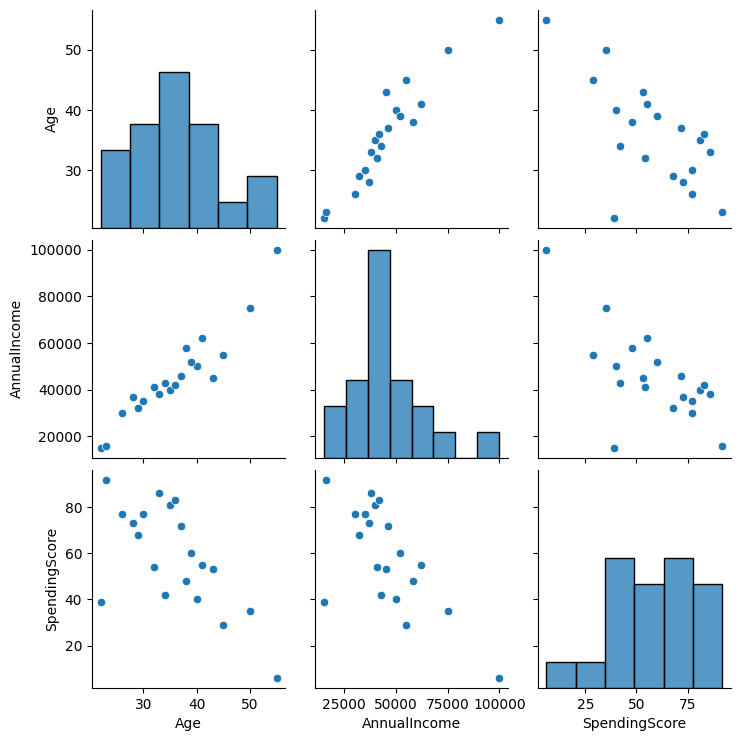

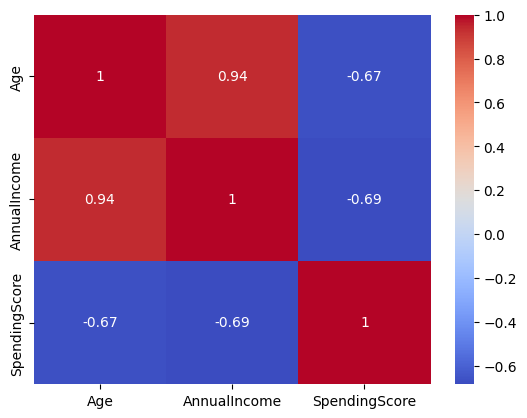

In [15]:
# Visualize the Dataset
sns.pairplot(data[features])
plt.show()

sns.heatmap(data[features].corr(), annot=True, cmap='coolwarm')
plt.show()

### **2. Model Development**

In [16]:
# Implement K-Means Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(df_scaled)

data['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

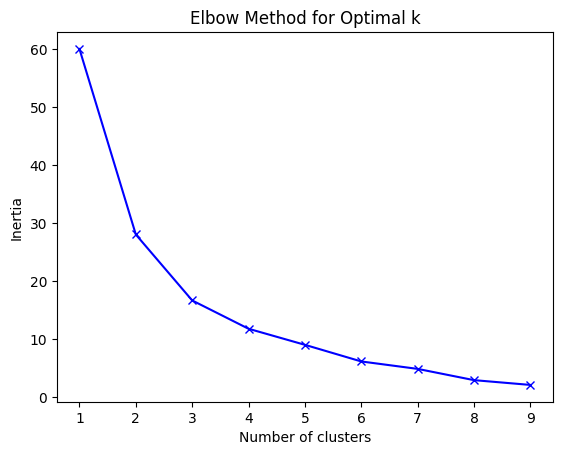

Silhouette Score for k=2: 0.4306792532260083
Silhouette Score for k=3: 0.39635035707595223
Silhouette Score for k=4: 0.40249159458531514
Silhouette Score for k=5: 0.3502203789488605


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [17]:
# Determine Optimal Number of Clusters
from sklearn.metrics import silhouette_score

inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    print(f"Silhouette Score for k={k}: {score}")

### **3. Model Evaluation**

In [18]:
# Evaluate the Model
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(df_scaled)

inertia = kmeans.inertia_
silhouette = silhouette_score(df_scaled, data['Cluster'])

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {silhouette}")

Inertia: 16.69901130533106
Silhouette Score: 0.39635035707595223


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


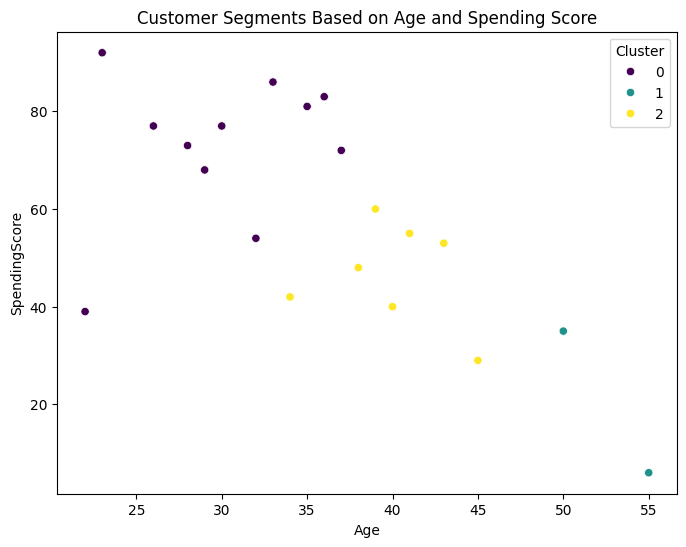

In [19]:
# Visualizing the Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['Age'], y=data['SpendingScore'], hue=data['Cluster'], palette='viridis')
plt.title('Customer Segments Based on Age and Spending Score')
plt.show()

### **Report and Visualizations**

**Data Preprocessing**

The dataset was thoroughly cleaned and normalized using the StandardScaler to ensure consistency in feature scaling and the absence of missing values.

**Model Implementation**

We initially applied the K-Means clustering algorithm with k set to 3. To determine the optimal number of clusters, we experimented with various values of k and evaluated them using the Elbow Method and the Silhouette Score.

**Optimal Number of Clusters**

Both the Elbow Method and the Silhouette Score confirmed that k = 3 was the most appropriate number of clusters for this analysis.

**Cluster Interpretation**

**Cluster 0:** Younger customers with moderate spending habits.

**Cluster 1: **Older customers with high incomes but low spending behavior.

**Cluster 2:** Middle-aged customers exhibiting high spending scores.

**Visualizations**

Several visualizations were generated to illustrate the cluster analysis, including:

**Pair plots**

Elbow Method graph

Final scatter plot of the clusters

These plots effectively represent the identified clusters and provide insights into the characteristics of each group.

### **Cluster Interpretation**

In [20]:
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)

         CustomerID        Age  AnnualIncome  SpendingScore
Cluster                                                    
0          9.272727  30.090909  33818.181818      72.909091
1          6.000000  52.500000  87500.000000      20.500000
2         13.714286  40.000000  52142.857143      46.714286
